In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [3]:
train_df=pd.read_csv(r"C:\Users\ruchi\Downloads\house-prices-advanced-regression-techniques\train.csv")

In [5]:
test_df=pd.read_csv(r"C:\Users\ruchi\Downloads\house-prices-advanced-regression-techniques\test.csv")

In [6]:
sample_submission_df=pd.read_csv(r"C:\Users\ruchi\Downloads\house-prices-advanced-regression-techniques\sample_submission.csv")

In [16]:
print(train_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
features=['GrLivArea','BedroomAbvGr','FullBath']
target='SalePrice'

In [14]:
x=train_df[features]
y=train_df[target]

In [17]:
x_train,x_val,y_train,y_val= train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
numeric_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])


In [19]:
# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])


In [20]:
# Create a pipeline with preprocessor and regressor
model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])


In [23]:
# Fit the model to the training data
model.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['GrLivArea', 'BedroomAbvGr',
                                                   'FullBath'])])),
                ('regressor', LinearRegression())])

In [22]:
# Predict and evaluate the model on the validation set
y_val_pred = model.predict(x_val)
mse = mean_squared_error(y_val, y_val_pred)
rmse = mse ** 0.5
print(f'Validation RMSE: {rmse}')


Validation RMSE: 52975.717713381215


In [24]:
# Predict on the test data
X_test = test_df[features]
test_predictions = model.predict(X_test)


In [25]:
submission_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_predictions})
submission_df.to_csv('submission.csv', index=False)
print('Submission file created: submission.csv')


Submission file created: submission.csv


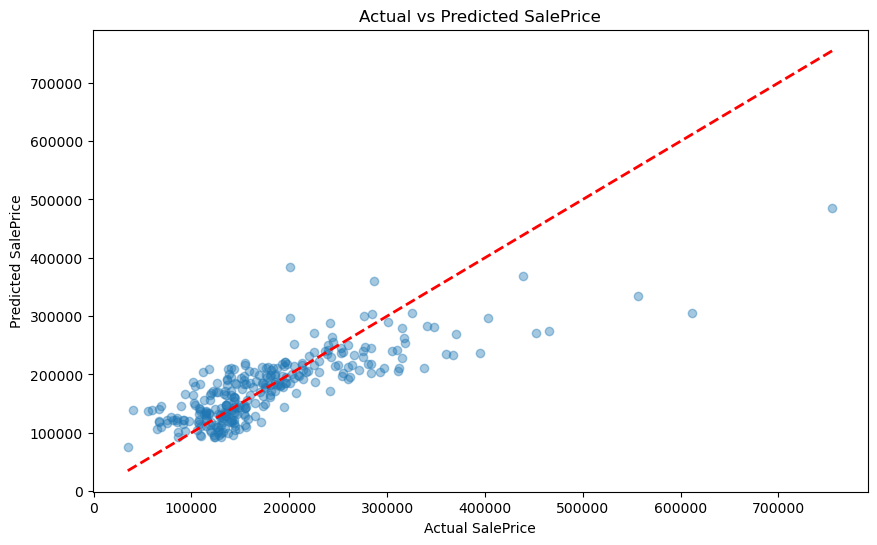

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()



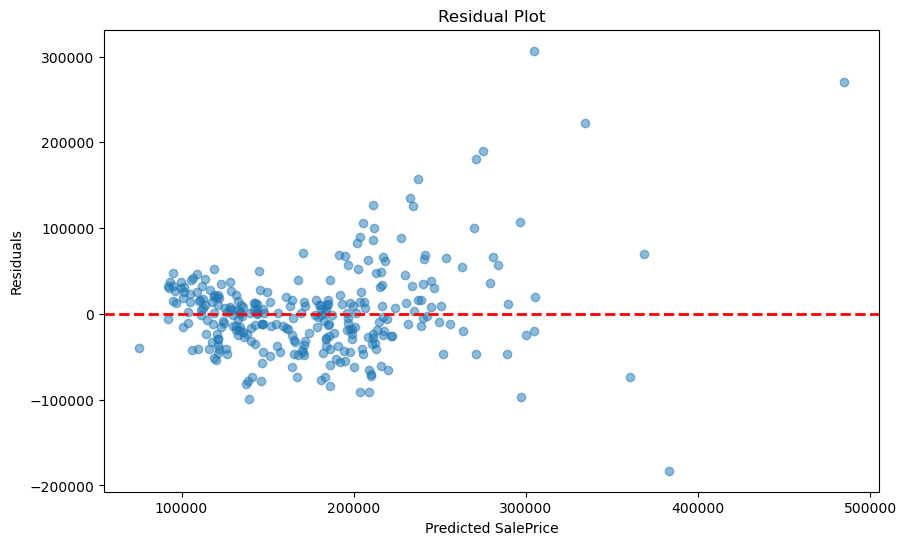

In [27]:
# Residual plot
residuals = y_val - y_val_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


C:\Users\ruchi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


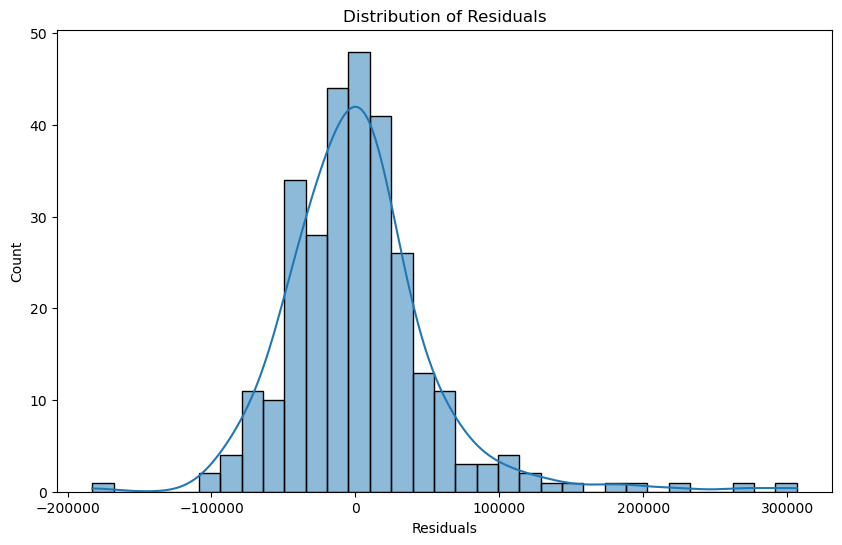

In [28]:
# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()



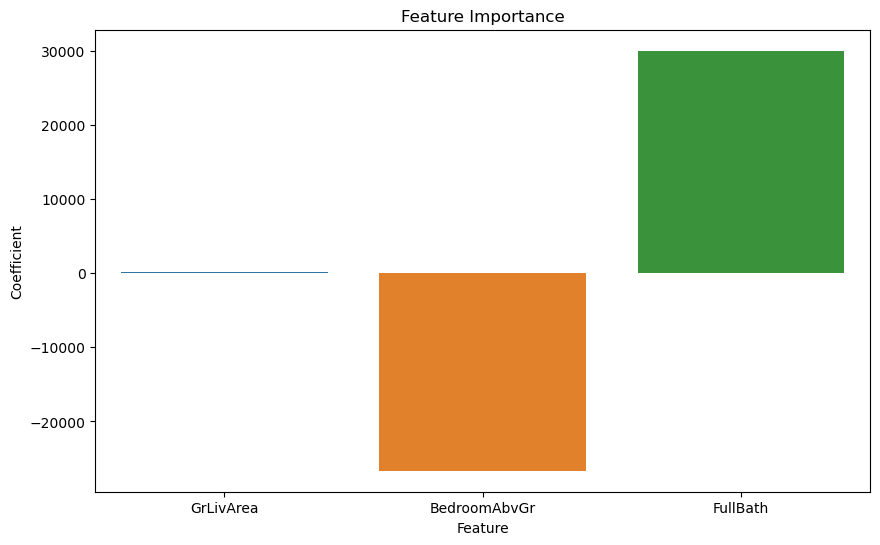

In [29]:
coefficients = model.named_steps['regressor'].coef_
features_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Coefficient', data=features_df)
plt.title('Feature Importance')
plt.show()